# Work with statistic image text
Version 1

In [1]:
# Files for examples
#name_file = '/home/al/Projects_My/NLP-russian-language/examples/recognition_text/creater_array_marked_char/data_set_jpg/sample_stat_1.jpg'
#name_file = '/home/al/MyProjects/NLP-russian-language/examples/recognition_text/creater_array_marked_char/data_set_jpg/sample_stat_2.jpg'
name_file = '/home/al/Projects_My/NLP-russian-language/examples/recognition_text/creater_array_marked_char/data_set_jpg/sample_stat_3.jpg'

In [2]:
%matplotlib inline
import pytesseract
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import copy
from collections import Counter

In [3]:
def show_image (img):
    plt.figure(figsize=(20,20))
    plt.imshow(img)
    plt.show()

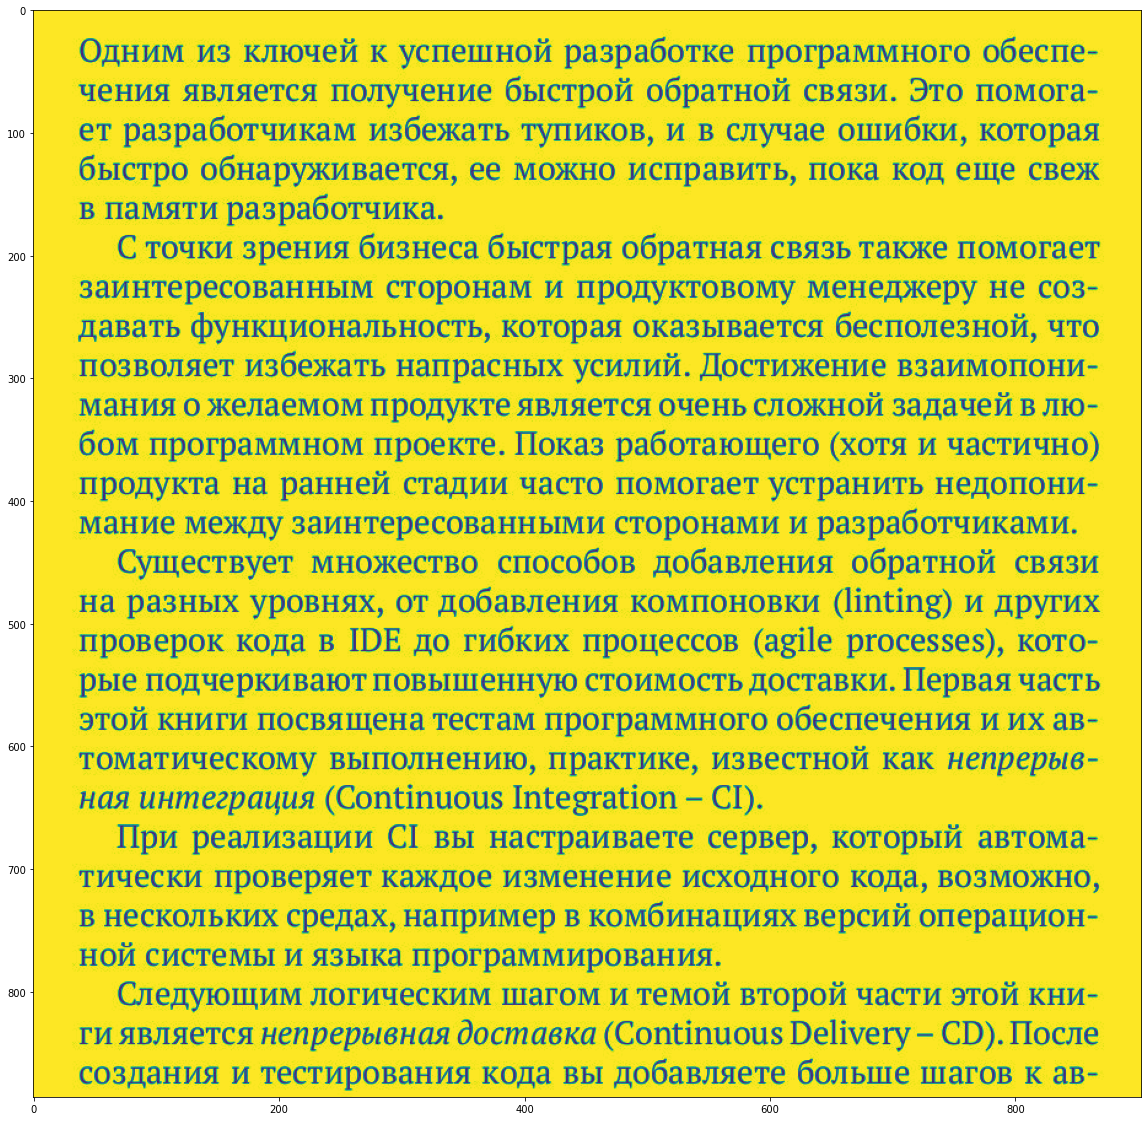

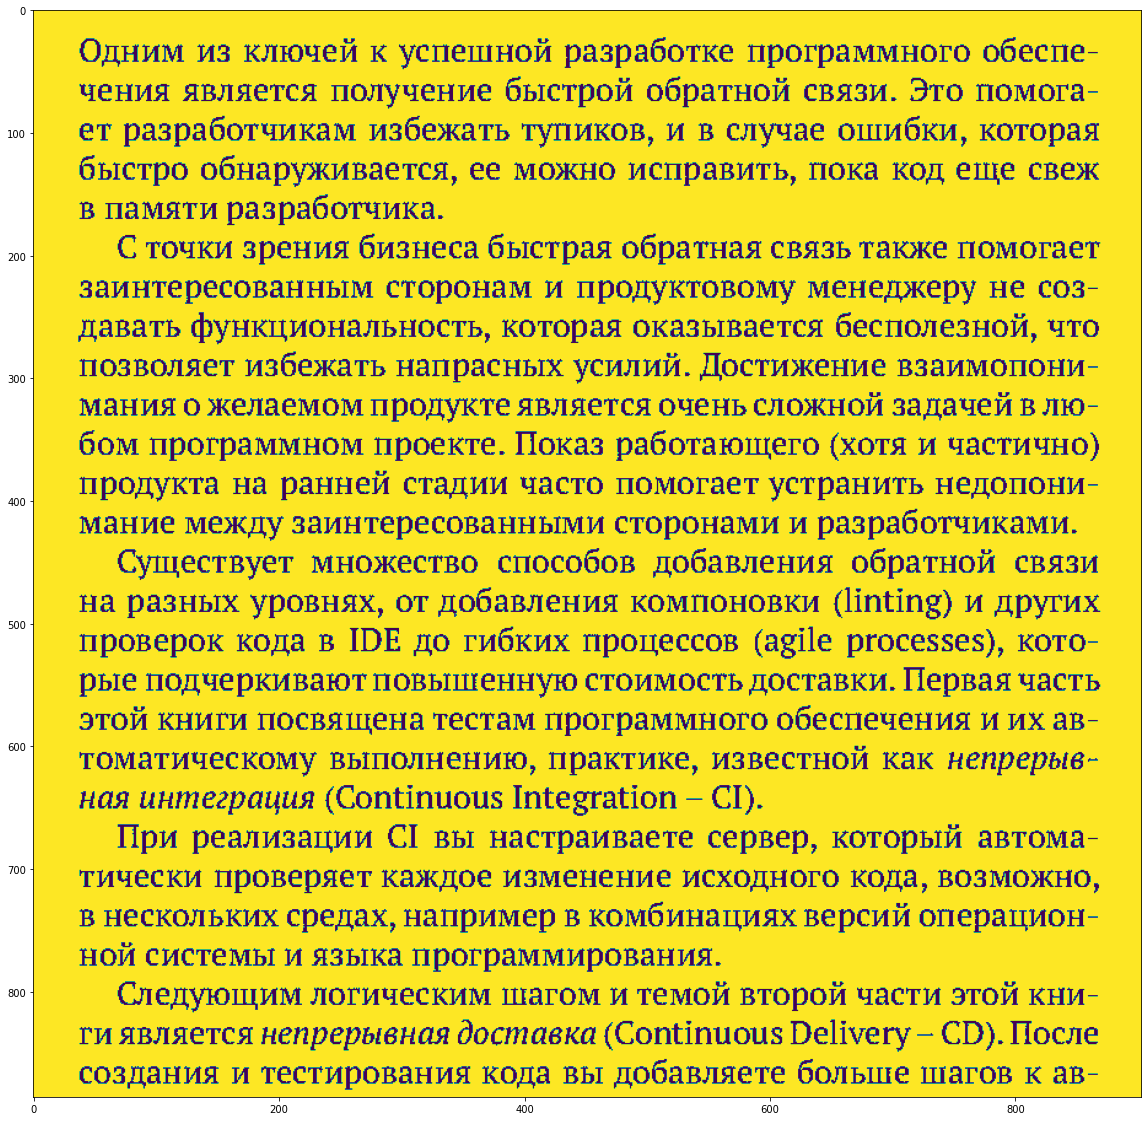

In [4]:
gray = cv2.imread(name_file, 0)
show_image(gray)
#gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
ret, threshold_gray = cv2.threshold(gray, 170, 255, 0)
show_image(threshold_gray)

In [5]:
def full_clear_page(page_img):
    clear_page ={"sum_clear_row":page_img.shape[1]*255, 
                 "sum_clear_colunm":page_img.shape[0]*255,
                 "sum_clear_page":page_img.shape[0]*page_img.shape[0]*255,
                 "com_num_pixel_page":page_img.shape[0]*page_img.shape[0],
                }
    return clear_page

In [33]:
def full_info_page(page_source, param = 170, vis = 0):
    """
    get start info about image of page
    """
    import numpy
    from collections import Counter
    
    # file type check
    #print(type(page_source))
    colunms = Counter()
    if type(page_source) is str:
        ret, page_img = cv2.threshold(cv2.imread(page_source, 0), param, 255, 0)
    elif type(page_source) is numpy.ndarray:
        ret, page_img = cv2.threshold(page_source, param, 255, 0)
    else:
       print("I do not this type!! " + str(page_source))
       return {}
    
    # visualisation page
    if vis == 1:
        show_image(page_img)
        
    # initial conditions
    clear_page = full_clear_page(page_img)
    num_clear_row = 0
    num_clear_colunm = 0
    num_clear_pixels_clear_rows = 0
    num_clear_pixels_clear_colunm = 0
    num_clear_pixels_page = 0
    
    # get iformation about rows
    for i_y in range(page_img.shape[0]):
        servis_col = 0
        for i_x in range(page_img.shape[1]):
            servis_col += page_img[i_y, i_x]
            colunms[i_x] += page_img[i_y, i_x]
            if page_img[i_y, i_x] == 255:
                num_clear_pixels_page +=1
        if servis_col == clear_page["sum_clear_row"] : 
            num_clear_pixels_clear_rows += page_img.shape[1]
            num_clear_row +=1

    # get iformation about colunms       
    for i in colunms:
        if colunms[i] == clear_page["sum_clear_colunm"] : 
            num_clear_colunm +=1
            num_clear_pixels_clear_colunm += page_img.shape[0]

            
    # output getting of info        
    clear_page['com_rows'] = page_img.shape[0]
    clear_page['com_colunms'] = page_img.shape[1]
    
    clear_page['num_clear_row'] = num_clear_row 
    clear_page['num_clear_colunm'] = num_clear_colunm
    
    clear_page['degree_clear_row'] = num_clear_row/page_img.shape[0]
    clear_page['degree_clear_colunm'] = num_clear_colunm/page_img.shape[1]
    
    clear_page['num_clear_pixels_clear_rows'] = num_clear_pixels_clear_rows
    clear_page['num_clear_pixels_clear_colunm'] = num_clear_pixels_clear_colunm
    clear_page['num_clear_pixels_page'] = num_clear_pixels_page
    clear_page['page_fullness'] = 1 - num_clear_pixels_page/clear_page['com_num_pixel_page']
    clear_page['degree_clear_page'] = num_clear_pixels_page/clear_page['com_num_pixel_page']
    
    return clear_page

In [34]:
#full_info_page(name_file)
full_info_page(gray)

{'sum_clear_row': 230265,
 'sum_clear_colunm': 225930,
 'sum_clear_page': 200173980,
 'com_num_pixel_page': 784996,
 'com_rows': 886,
 'com_colunms': 903,
 'num_clear_row': 217,
 'num_clear_colunm': 71,
 'degree_clear_row': 0.24492099322799096,
 'degree_clear_colunm': 0.07862679955703211,
 'num_clear_pixels_clear_rows': 195951,
 'num_clear_pixels_clear_colunm': 62906,
 'num_clear_pixels_page': 690345,
 'page_fullness': 0.12057513668859454,
 'degree_clear_page': 0.8794248633114055}

In [36]:
name_jpg2 = '/home/al/Projects_My/NLP-russian-language/examples/recognition_text/creater_array_marked_char/data_set_jpg/staistc_dirt/1969п278н_6.jpg'
full_info_page(name_jpg2)

{'sum_clear_row': 645915,
 'sum_clear_colunm': 903720,
 'sum_clear_page': 3202783680,
 'com_num_pixel_page': 12559936,
 'com_rows': 3544,
 'com_colunms': 2533,
 'num_clear_row': 842,
 'num_clear_colunm': 51,
 'degree_clear_row': 0.2375846501128668,
 'degree_clear_colunm': 0.020134228187919462,
 'num_clear_pixels_clear_rows': 2132786,
 'num_clear_pixels_clear_colunm': 180744,
 'num_clear_pixels_page': 8198975,
 'page_fullness': 0.34721203993396144,
 'degree_clear_page': 0.6527879600660386}

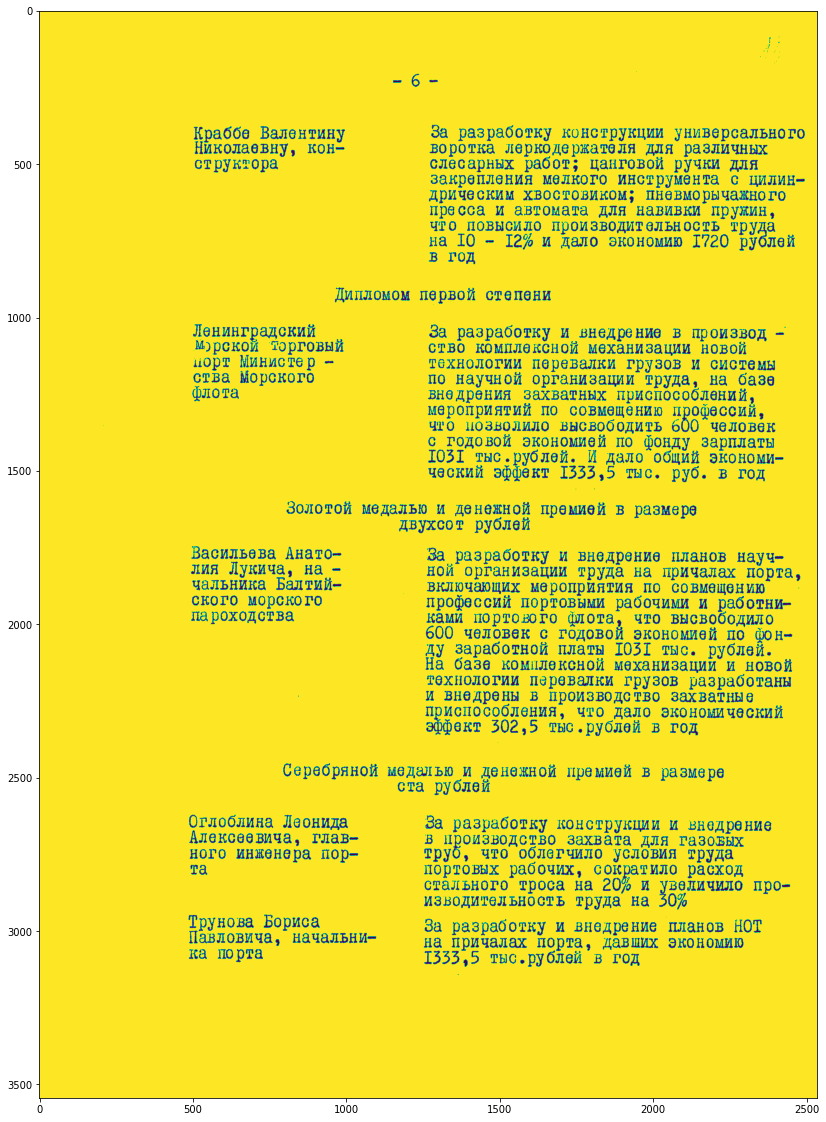

{'sum_clear_row': 645915, 'sum_clear_colunm': 903720, 'sum_clear_page': 3202783680, 'com_num_pixel_page': 12559936, 'com_rows': 3544, 'com_colunms': 2533, 'num_clear_row': 1164, 'num_clear_colunm': 527, 'degree_clear_row': 0.32844243792325056, 'degree_clear_colunm': 0.2080536912751678, 'num_clear_pixels_clear_rows': 2948412, 'num_clear_pixels_clear_colunm': 1867688, 'num_clear_pixels_page': 8422299, 'page_fullness': 0.32943137608344497, 'degree_clear_page': 0.670568623916555}


In [39]:
name_jpg2 = '/home/al/Projects_My/NLP-russian-language/examples/recognition_text/creater_array_marked_char/data_set_jpg/staistc_dirt/1969п278н_6.jpg'
inf_page = full_info_page(name_jpg2, param=50, vis=1)
print(inf_page)

In [8]:
# building histagramm bright strings image
print(threshold_gray.shape)
max_page_row = threshold_gray.shape[1]*255
print(full_info_page(threshold_gray))

(886, 903)
<class 'numpy.ndarray'>
{'clear_row': 230265, 'clear_colunm': 225930, 'clear_page': 200173980, 'num_clear_row': 217, 'num_clear_colunm': 71, 'degree_clear_row': 0.24492099322799096, 'degree_clear_colunm': 0.07862679955703211}


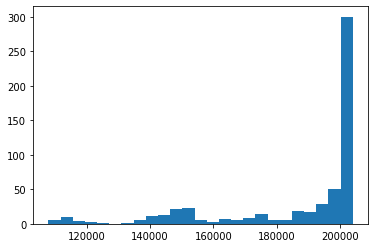

In [6]:
list_hist = []
cc_cc = Counter()
for y_list in range(threshold_gray.shape[0]):
    summ_string = 0
    for x_list in range(threshold_gray.shape[1]):
       summ_string += threshold_gray[y_list, x_list]
    list_hist.append(summ_string)
    cc_cc[summ_string]+=1
plt.hist(list_hist, 25)
plt.show()

In [7]:
median = np.median(np.array(list_hist)) 
print(median)

201322.5


In [8]:
average = np.average(np.array(list_hist)) 
print(average)

187455.1855123675


In [9]:
forse_clear = (median - average)*100/average
print(forse_clear)

7.397669181425553


In [10]:
print(max(list_hist))

204000


In [11]:
forse_clear_2 = (max(list_hist) - median)*100/max(list_hist)
print(forse_clear_2)

1.3125


In [12]:
print(cc_cc[max(list_hist)])

210


In [13]:
print(cc_cc[max(list_hist)]/threshold_gray.shape[0])

0.3710247349823322


In [14]:
def force_clear(name_is_file):
    gray = cv2.imread(name_is_file, 0)
    ret, threshold_gray = cv2.threshold(gray, 170, 255, 0)
    #show_image(threshold_gray)
    com_num_row = threshold_gray.shape[0]
    list_hist = []
    cc_cc = Counter()
    for y_list in range(threshold_gray.shape[0]):
        summ_string = 0
        for x_list in range(threshold_gray.shape[1]):
           summ_string += threshold_gray[y_list, x_list]
        list_hist.append(summ_string)
        cc_cc[summ_string]+=1
    max_page = gray.shape[1]*255
    print('max_page = ', max_page, 'max(list_hist) = ', max(list_hist))
    print()
    return float(cc_cc[max(list_hist)]/com_num_row)

In [15]:
def force_clear_paran(name_is_file, param:int):
    gray_c = cv2.imread(name_is_file, 0)
    ret, threshold_gray_c = cv2.threshold(gray_c, param, 255, 0)
    show_image(threshold_gray_c)
    com_num_row = threshold_gray_c.shape[0]
    list_hist_c = []
    cc_cc_c = Counter()
    for y_list in range(threshold_gray_c.shape[0]):
        summ_string = 0
        for x_list in range(threshold_gray_c.shape[1]):
           summ_string += threshold_gray_c[y_list, x_list]
        list_hist_c.append(summ_string)
        cc_cc_c[summ_string]+=1
    return float(cc_cc_c[max(list_hist_c)]/com_num_row)

max_page =  632400 max(list_hist) =  632400



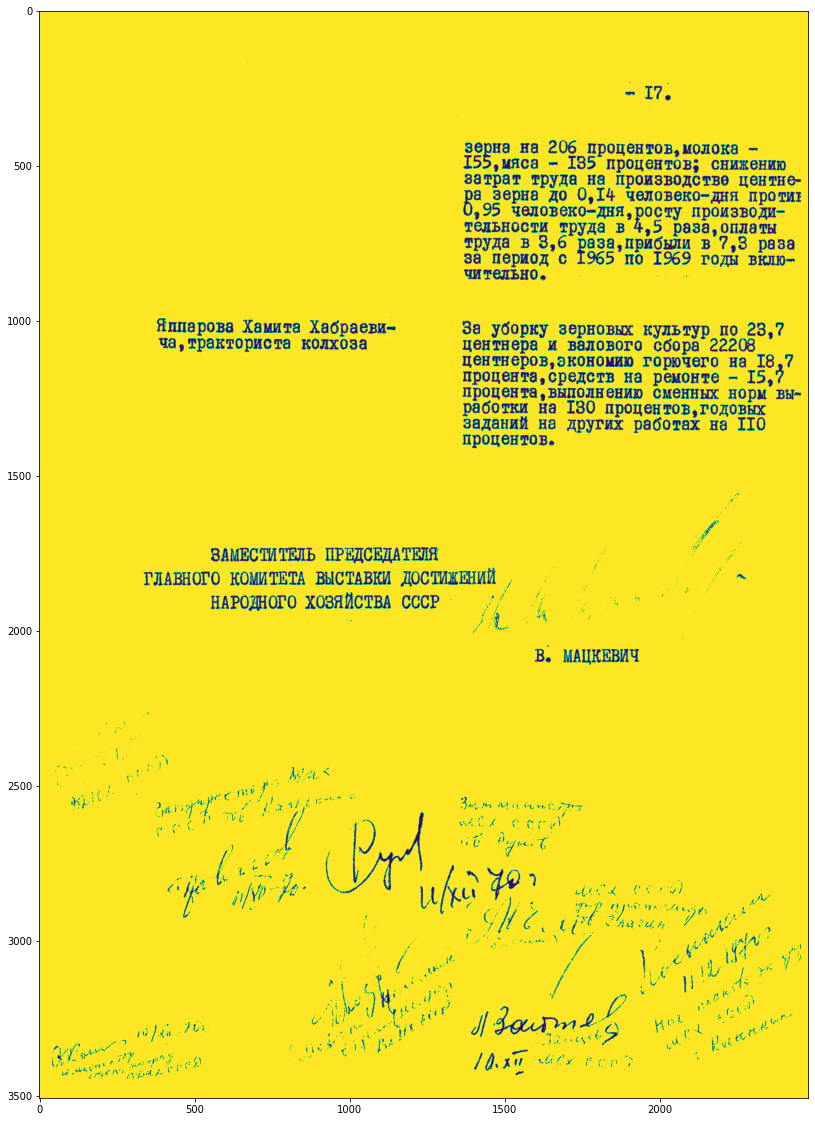

koef =  0.2149985742800114 koef_2 =  0.2919874536641004
max_page =  632400 max(list_hist) =  632400



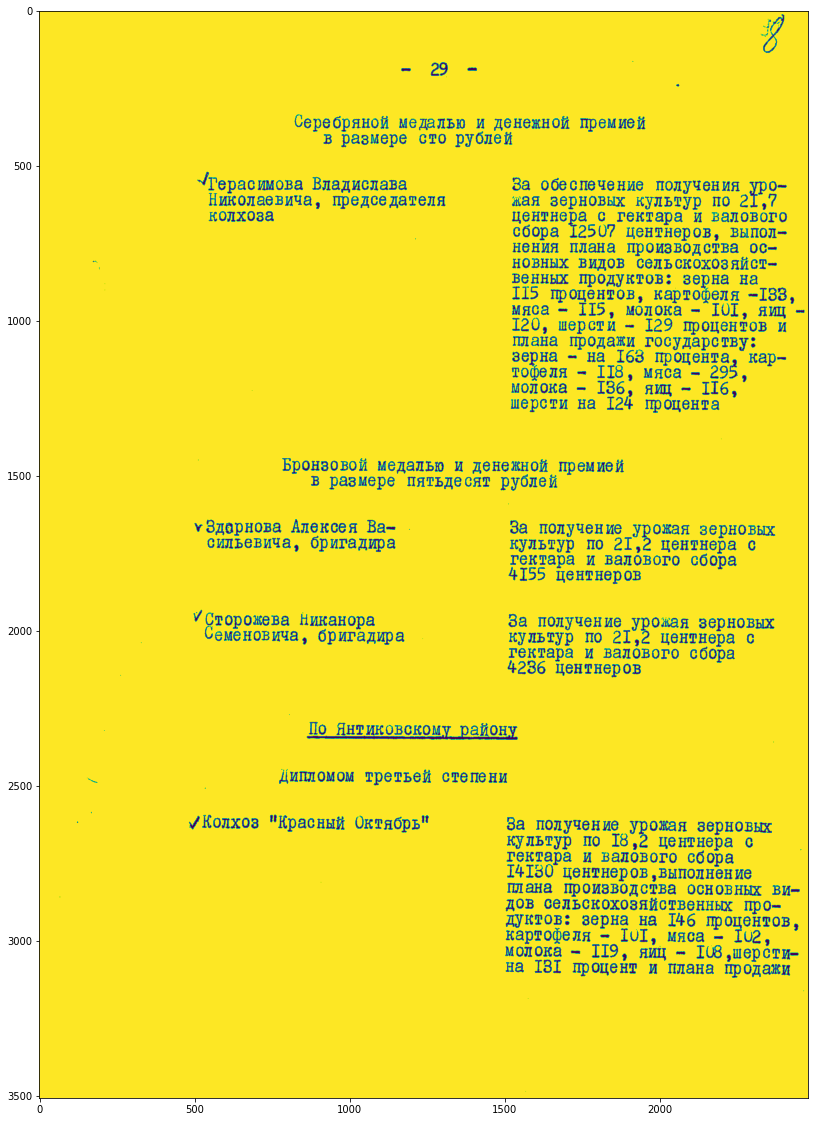

koef =  0.3712574850299401 koef_2 =  0.3712574850299401
max_page =  633675 max(list_hist) =  633675



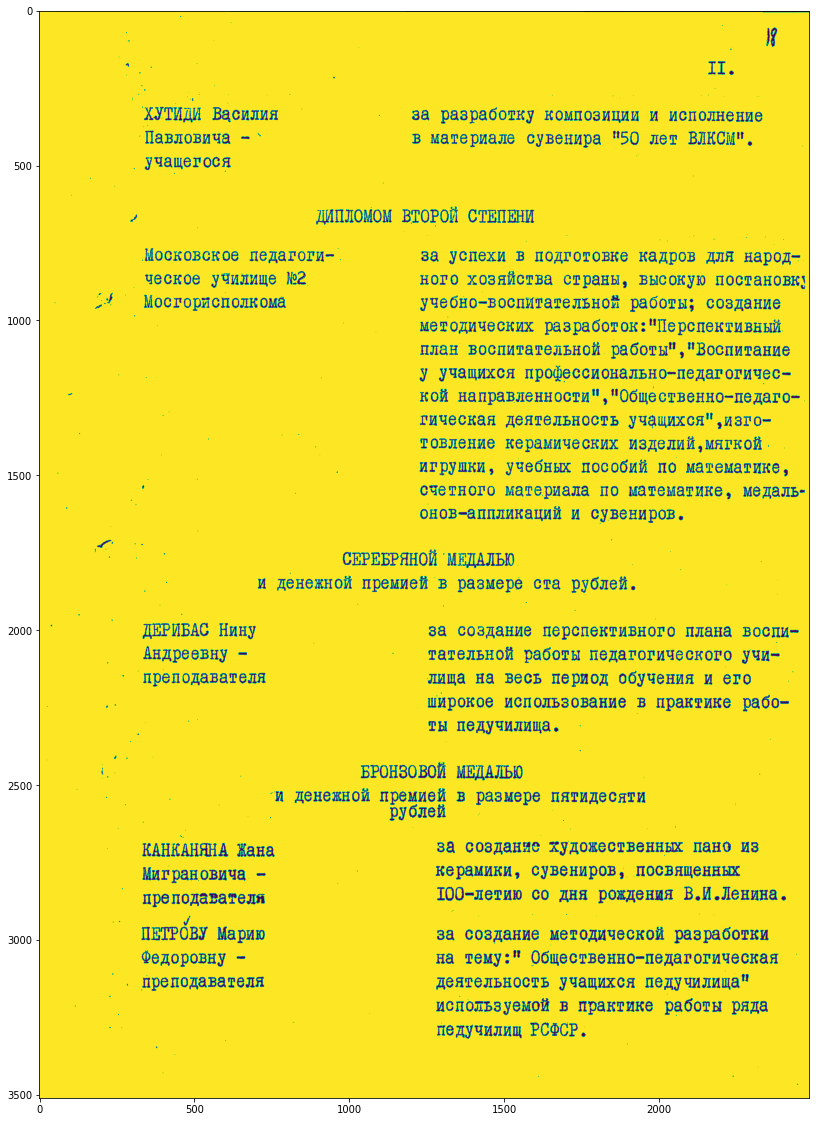

koef =  0.3544159544159544 koef_2 =  0.3544159544159544
max_page =  632400 max(list_hist) =  632400



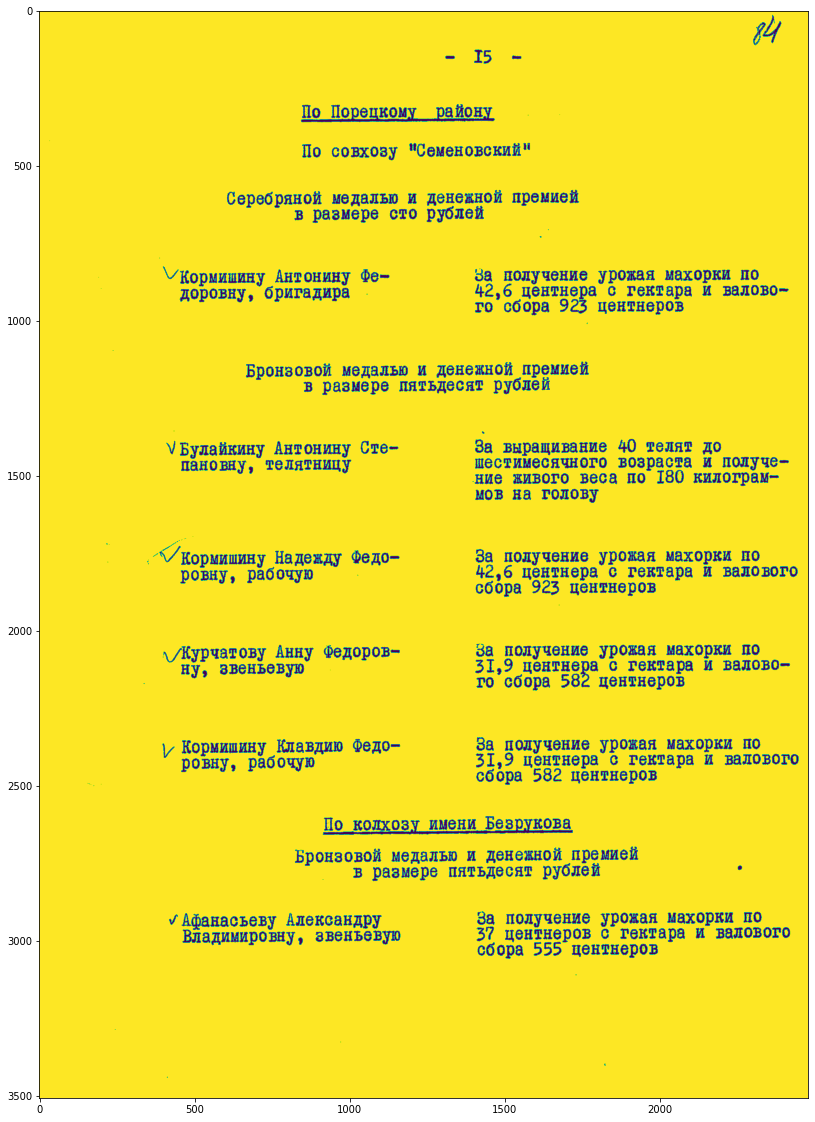

koef =  0.5240946678072427 koef_2 =  0.5240946678072427
max_page =  645915 max(list_hist) =  645915



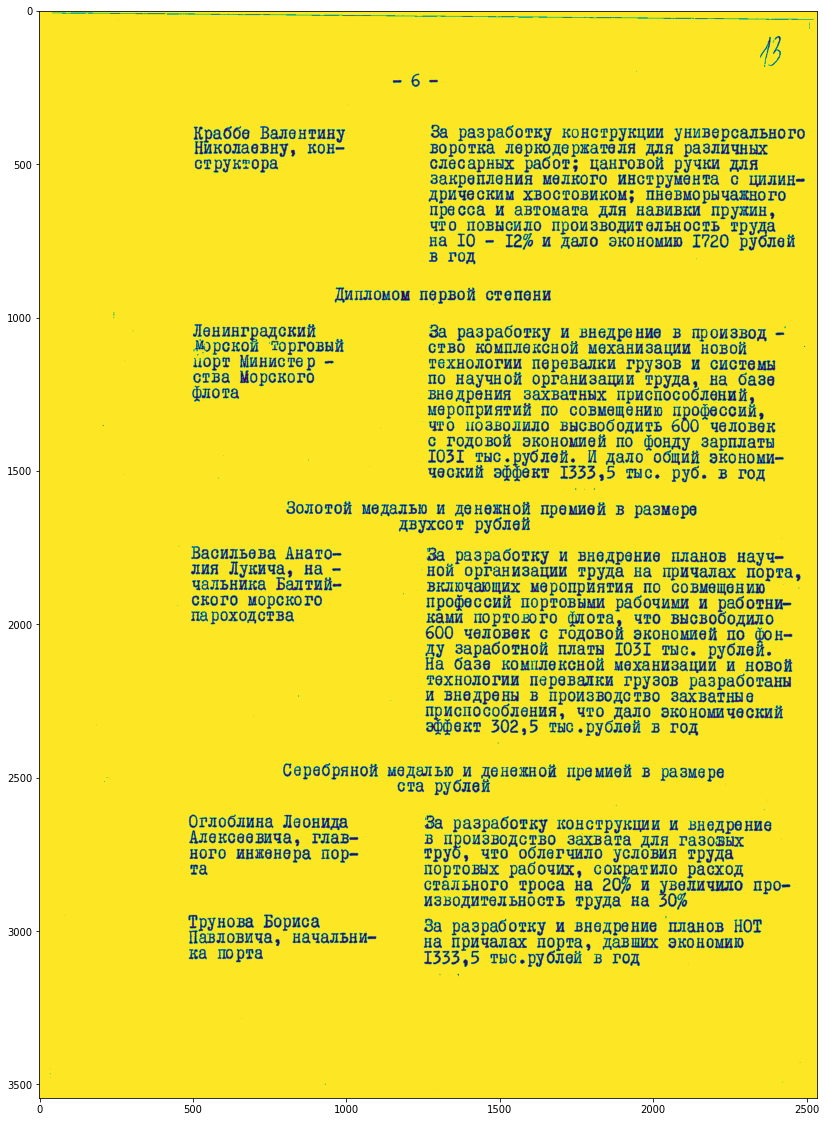

koef =  0.2375846501128668 koef_2 =  0.28414221218961627
max_page =  632400 max(list_hist) =  632400



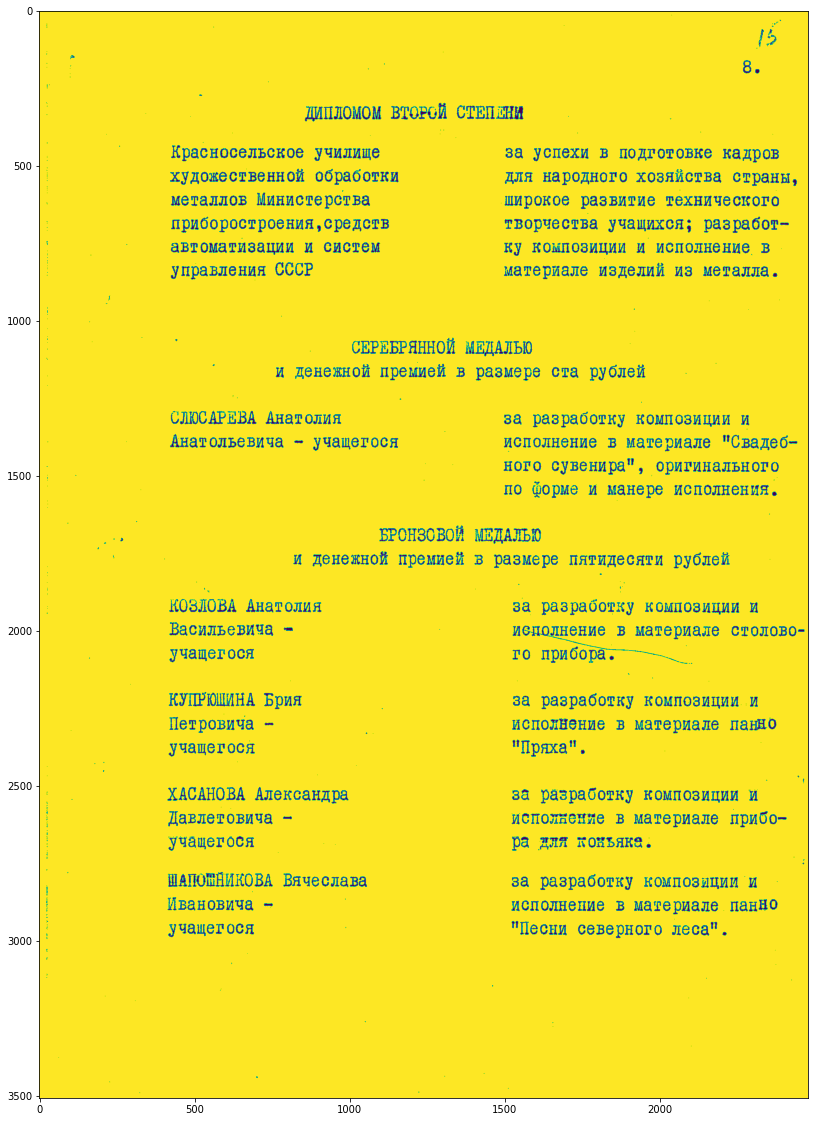

koef =  0.27601938979184487 koef_2 =  0.44026233247790136
max_page =  614295 max(list_hist) =  614295



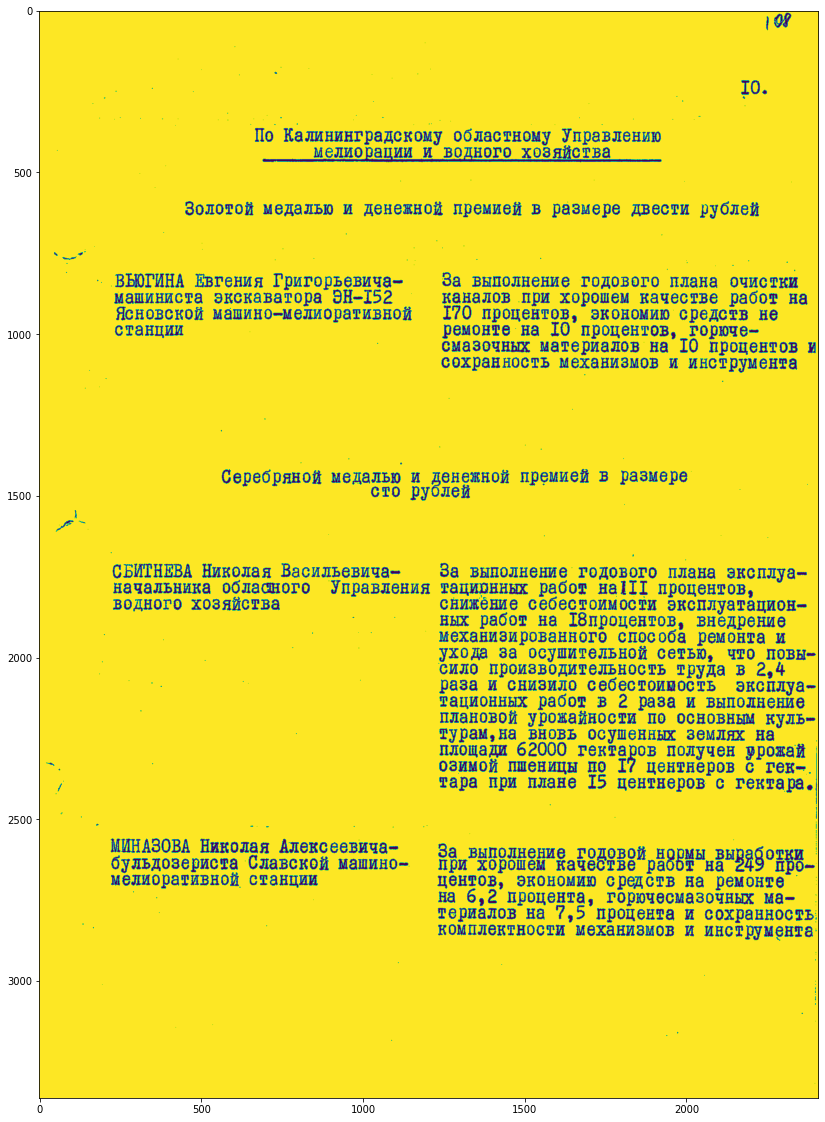

koef =  0.37864366448542536 koef_2 =  0.37864366448542536
max_page =  632400 max(list_hist) =  632400



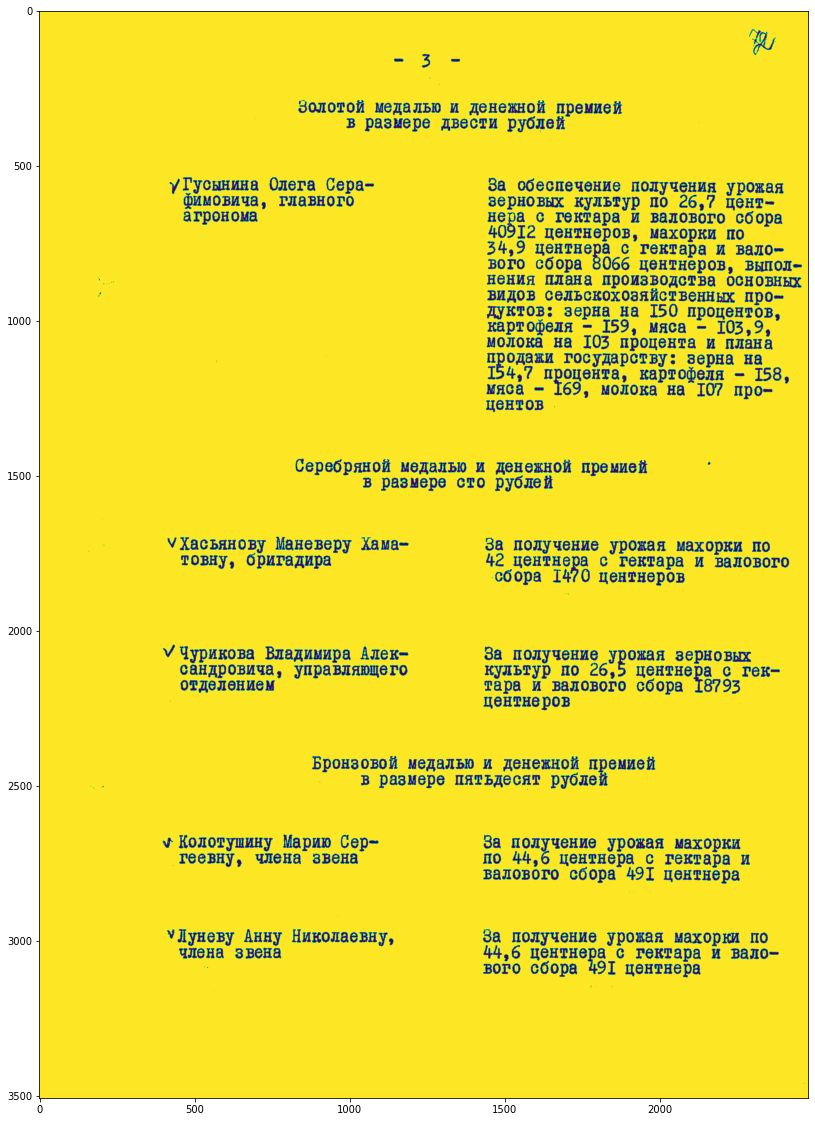

koef =  0.4630738522954092 koef_2 =  0.4630738522954092
max_page =  632400 max(list_hist) =  632400



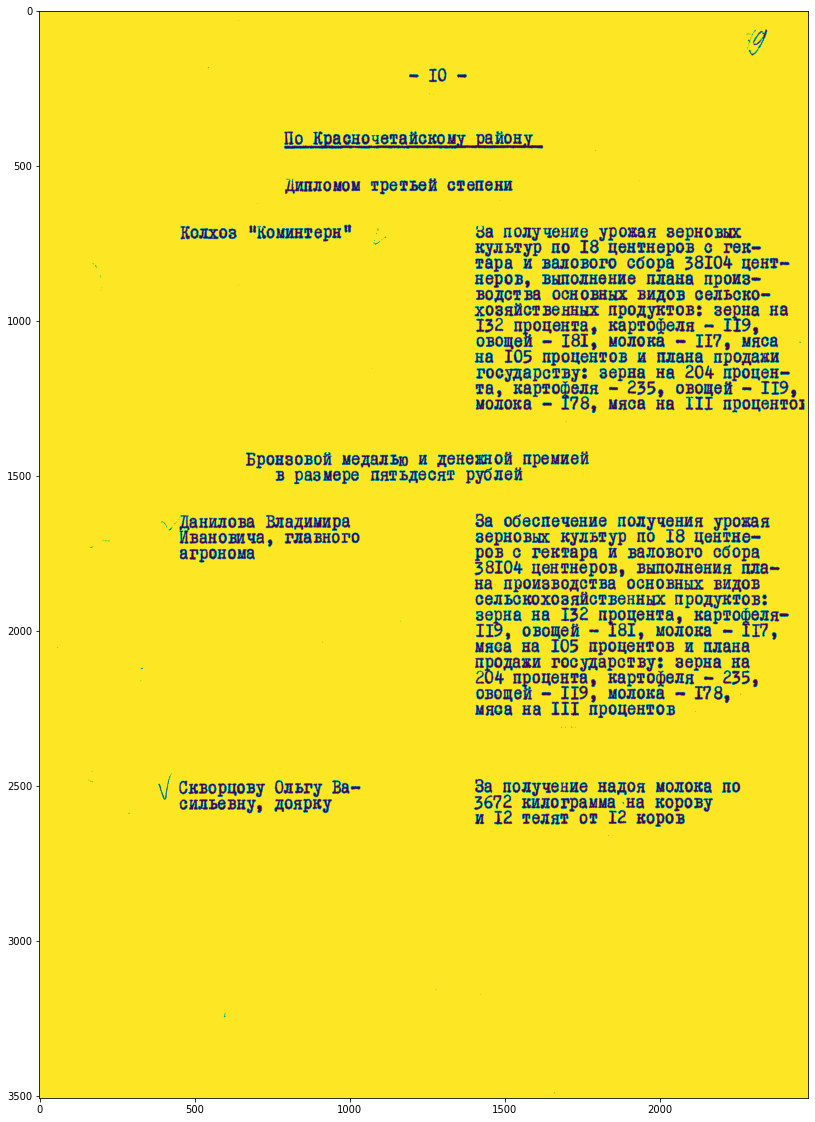

koef =  0.49016253207869975 koef_2 =  0.49016253207869975
max_page =  632400 max(list_hist) =  632400



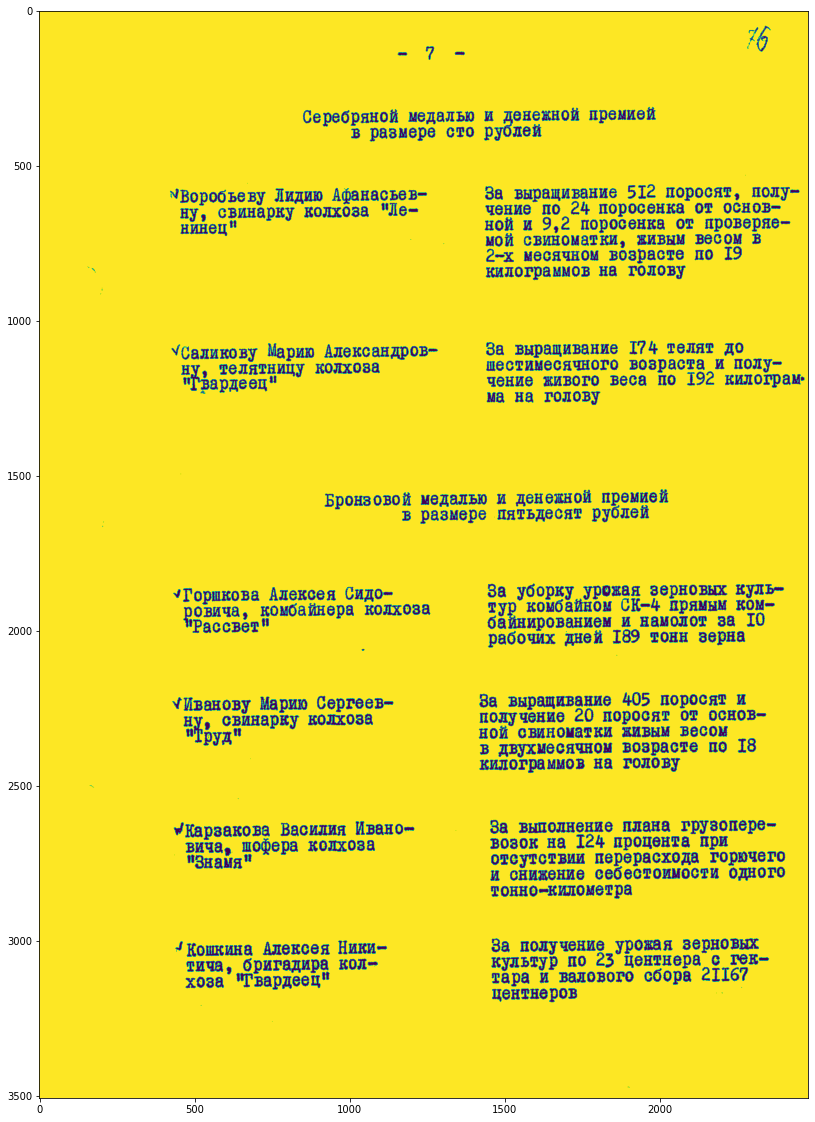

koef =  0.49101796407185627 koef_2 =  0.49101796407185627
max_page =  634185 max(list_hist) =  634185



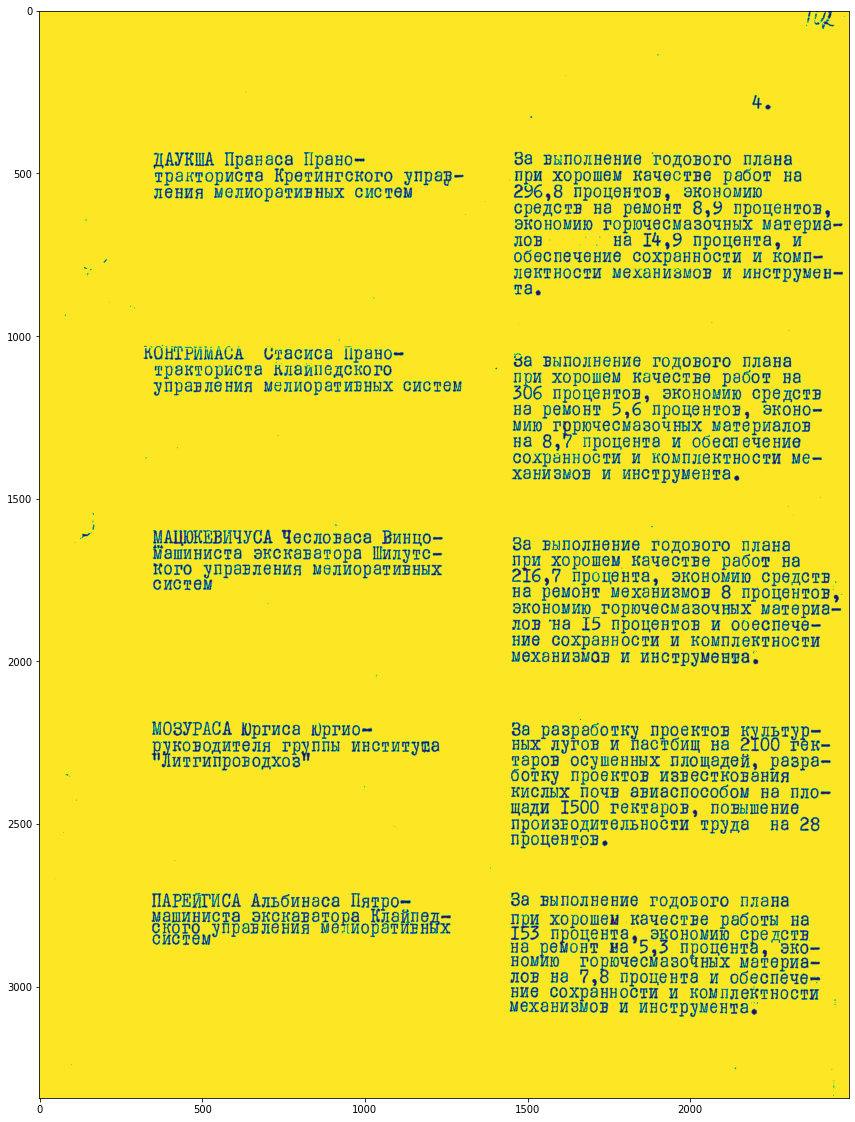

koef =  0.33453022142429684 koef_2 =  0.3393177737881508
max_page =  632400 max(list_hist) =  632400



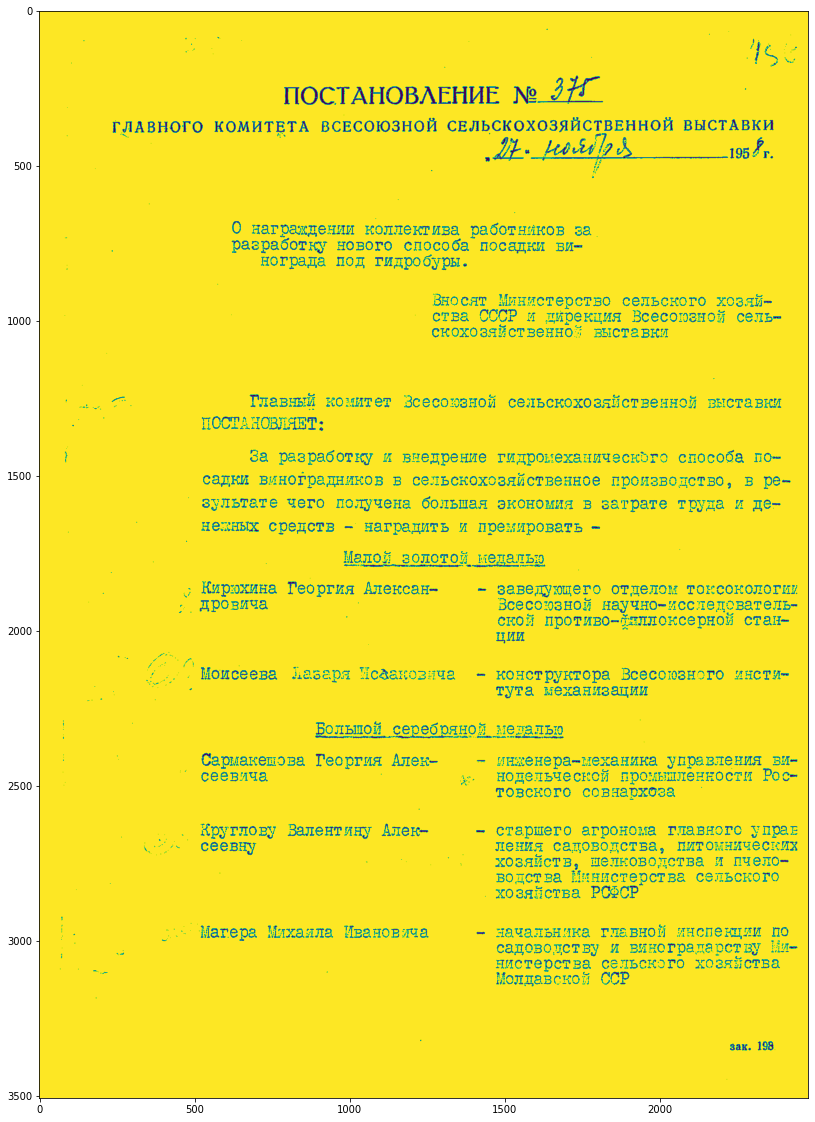

koef =  0.08896492728828058 koef_2 =  0.40975192472198463


In [21]:
import glob
list_files = glob.glob('/home/al/Projects_My/NLP-russian-language/examples/recognition_text/creater_array_marked_char/data_set_jpg/staistc_dirt/*.jpg')
for name_f in list_files:
    koef = force_clear(name_f)
    if koef<0.35:
        param = 170 - int((0.35 -koef)*100*4)
        koef_2 = force_clear_paran(name_f, param)
        print('koef = ', koef, 'koef_2 = ', koef_2)
#     if koef < 0.28 and koef>1.0:
#         koef_2 = force_clear_paran(name_f, 90)
#         print('koef = ', koef, 'koef_2 = ', koef_2)
#     elif koef<1.0:
#         koef_2 = force_clear_paran(name_f, 78)
#         print('koef = ', koef, 'koef_2 = ', koef_2)
    else:
        koef_2 = force_clear_paran(name_f, 170)
        print('koef = ', koef, 'koef_2 = ', koef_2)
        
        